## Analysis of Factors Affecting Students' Test Performance

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- "This study investigates the correlation between students' test performance and various factors including gender, ethnicity, parental education level, lunch quality, and test preparation participation."

-  **Importance of the Study:**
  - The correlation between students' test performance and various demographic and socio-economic factors has long been of interest to researchers and educators.
  - Identifying these correlations can help identify achievement gaps and inform targeted interventions to support student success.

- **Objectives:**
  - **Gender:** Investigating whether there are differences in test performance between male and female students and understanding the potential underlying factors contributing to any observed disparities.
  - **Ethnicity:** Examining the performance of students from different ethnic backgrounds to identify any patterns or trends and assess the impact of ethnicity on test scores.
  - **Parental Education Level:** Assessing the influence of parental education on students' academic achievement and exploring whether higher parental education levels are associated with higher test scores.
  - **Lunch Quality:** Investigating whether there is a correlation between the quality of lunch provided to students (standard vs. free/reduced) and their test performance, considering the potential role of nutrition and socioeconomic factors.
  - **Test Preparation Participation:** Exploring whether participation in test preparation courses or programs is associated with improved test performance and understanding the effectiveness of such interventions in supporting student learning.

- **Methodology:**
  - This study utilizes https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977taset source] containing information on students' demographic characteristics, test scores, parental education, lunch status, and test preparation participation.
  - Exploratory data analysis (EDA) techniques, correlation analysis, and multivariate analysis methods will be employed to investigate the relationships between these factors and students' test performance.

- **Significance:**
  - The findings of this study have implications for educational policy and practice, providing insights into factors that may influence students' academic achievement.
  - By understanding the correlates of test performance, educators and policymakers can develop targeted interventions and allocate resources effectively to support students' academic success and promote edus?datasetId=74977


### Data Description

The dataset used in this study contains information on students' demographic characteristics, test scores, parental education level, lunch status, and test preparation participation. Here's an overview of the variables included in the dataset:

- **Gender**: This variable indicates the gender of the student (e.g., male or female).

- **Ethnicity**: Ethnicity represents the racial or ethnic background of the student. The dataset may include categories such as Group A, Group B, Group C, Group D, and Group E.

- **Parental Level of Education**: This variable captures the highest level of education attained by the student's parent or guardian. Categories may include:
  - Some High School
  - High School
  - Some College
  - Associate's Degree
  - Bachelor's Degree
  - Master's Degree

- **Lunch**: Lunch status indicates whether the student receives a standard lunch or a free/reduced lunch.

- **Test Preparation Course**: This variable denotes whether the student has completed a test preparation course or program.

- **Math Score**: The student's score on the mathematics test.

- **Reading Score**: The student's score on the reading comprehension test.

- **Writing Score**: The student's score on the writing test.

- **Total Score**: The sum of the math, reading, and writing scores.

- **Average**: The average score obtained by the student across all three subjects (math, reading, writing).

#### Sample Size and Data Preprocessing

The dataset comprises a sample of 1000 students. Prior to analysis, the data may undergo preprocessing steps, such as handling missing values, encoding categorical variables, and scaling numerical features. Exploratory data analysis (EDA) techniques may also be applied to gain insights into the distribution of variables and identify any patterns or outliers in the data.



### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/raw.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### "The dataset is complete and contains no missing values."

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

#### "The dataset does not contain any duplicate values."

### 3.3 Check data types

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
Upon reviewing the numerical data description, it's notable that the means for all subjects fall within a narrow range, approximately between 66 and 68.05.
Similarly, the standard deviations for each subject are relatively consistent, ranging from 14.6 to 15.19.
It's interesting to observe that while the minimum score for math is 0, indicating a complete range of scores, the minimum scores for writing and reading are notably higher, with writing starting at 10 and reading at 17."


### 3.7 Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves exploring and understanding the characteristics of the dataset. In this section, we'll perform various analyses and visualizations to gain insights into the relationships between different variables and the overall distribution of data.tribution


In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
# Define the list of columns
columns_to_check = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

# Iterate through each column and print its unique categories
for column in columns_to_check:
    print("Categories in '{}' variable:".format(column), end=" ")
    print(df[column].unique())


Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable: ['none' 'completed']


In [12]:
# Define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print numerical features
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))

# Print categorical features
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))


We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adding columns for "Total Score" and "Average"

In [14]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
# Calculate the number of students with full marks in each subject
math_full = df[df['math_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
reading_full = df[df['reading_score'] == 100]['average'].count()

# Print the results
print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [16]:
# Calculate the number of students with less than or equal to 20 marks in each subject
math_less_20 = df[df['math_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()

# Print the results
print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')


Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insightss:

Based on the analysis, it's evident that students performed poorest in the Mathematics section.
Conversely, the highest performance is observed in the Reading section."

### 4. Exploring Data ( Visualization )
#### 4.1 Gender Distribution:

Let's start by examining the distribution of gender among the students in the dataset.


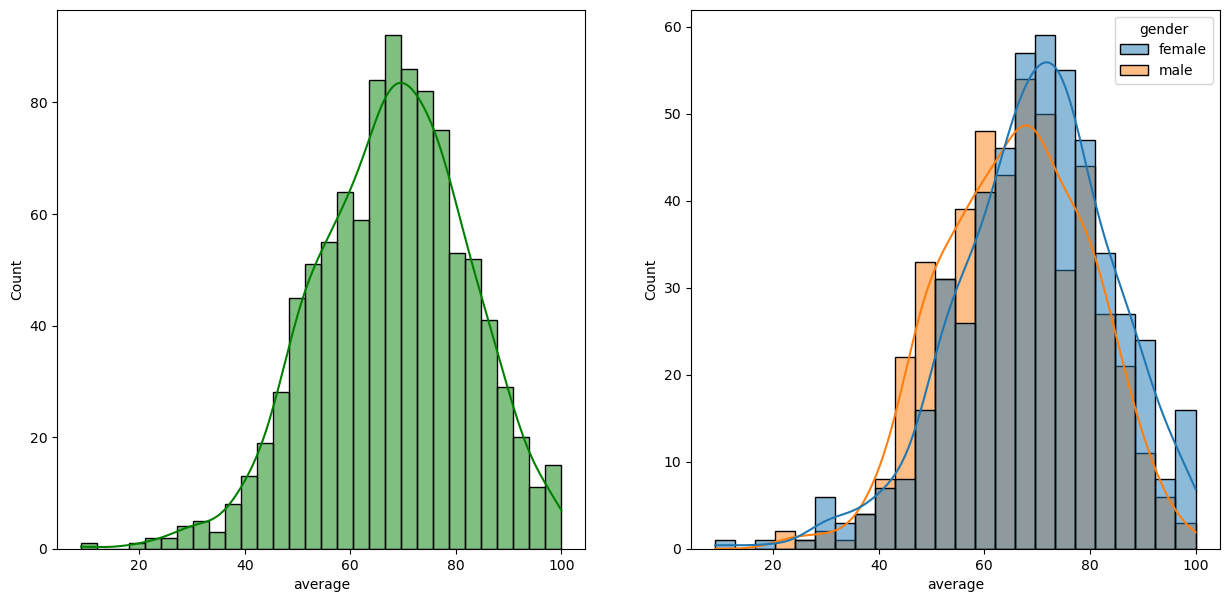

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot the distribution of average scores overall
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])

# Plot the distribution of average scores by gender
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])

plt.show()


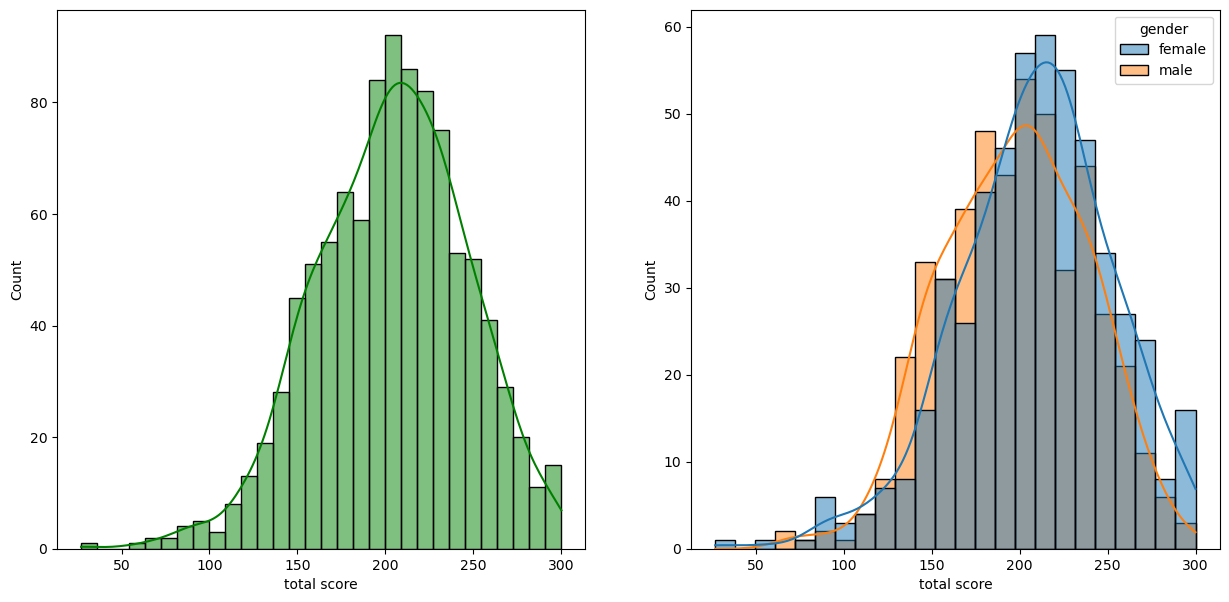

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot the distribution of total scores overall
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g', ax=axs[0])

# Plot the distribution of total scores by gender
sns.histplot(data=df, x='total score', kde=True, hue='gender', ax=axs[1])

plt.show()


#####  Insights
- Female students demonstrate stronger academic performance compared to male students.

#### 4.2 Lunch Quality:
We'll analyze the distribution of lunch quality (standard vs. free/reduced) among students and its relationship with test scores.

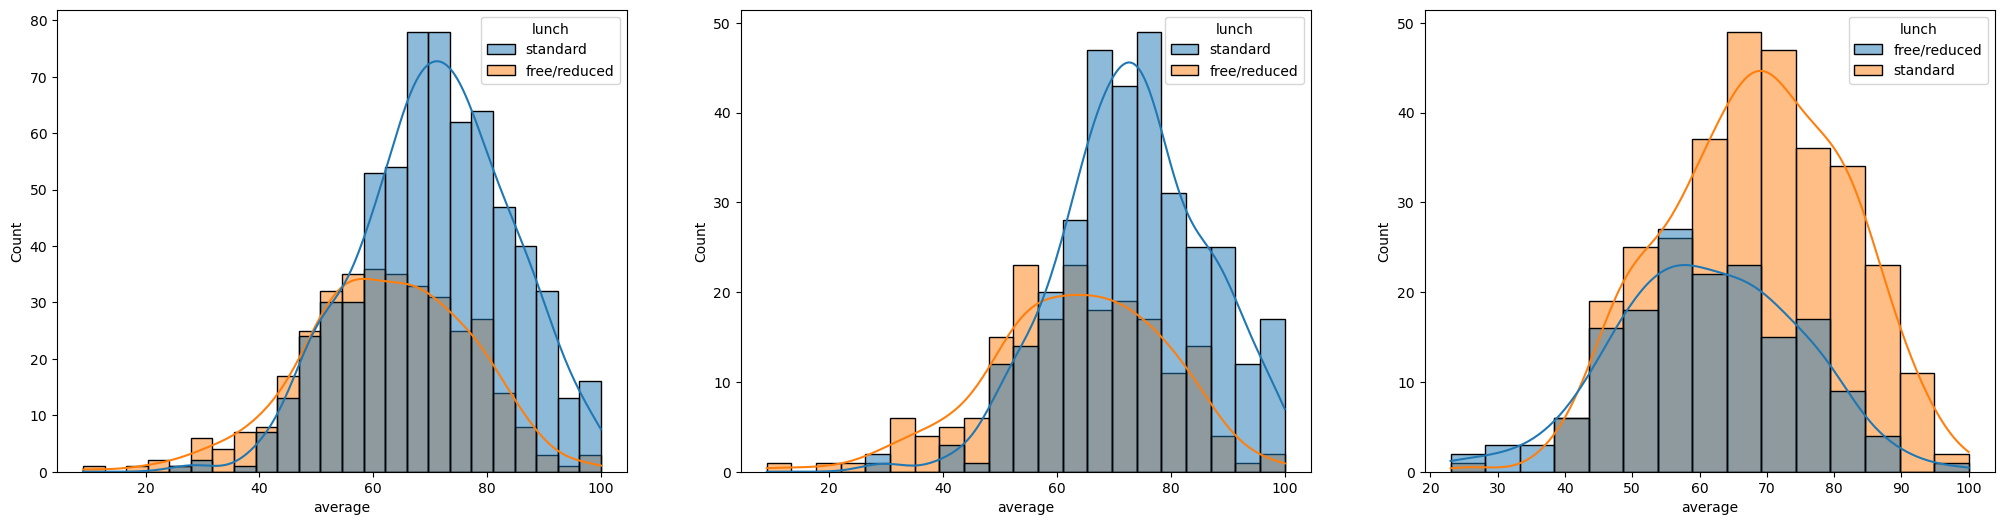

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# Plot for all students
sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axs[0])

# Plot for female students
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='lunch', ax=axs[1])

# Plot for male students
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='lunch', ax=axs[2])

plt.show()



#####  Insights
Students who have standard lunch tend to perform better in exams compared to those who have free/reduced lunch.
This trend holds true across both male and female students, indicating that standard lunch positively influences academic performance regardless of gender

#### 4.3 Test Preparation Participation:
We'll examine the participation of students in test preparation courses and its association with their test scores.

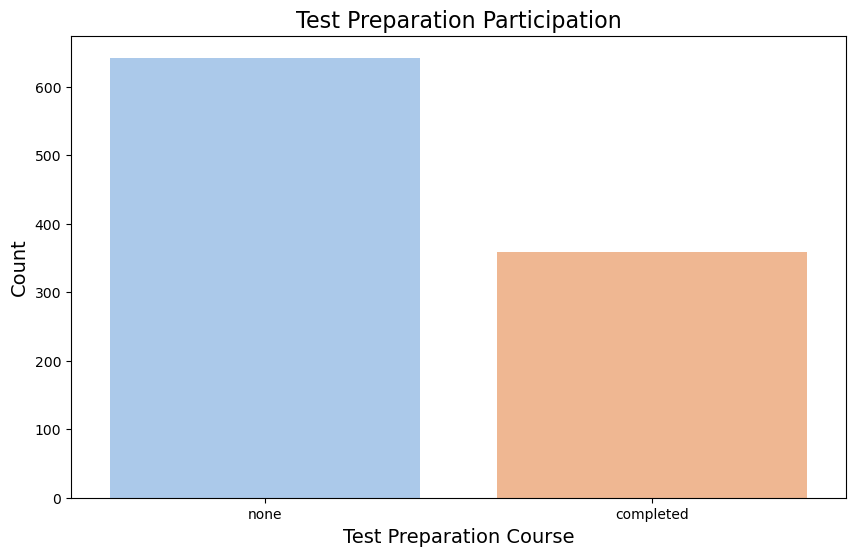

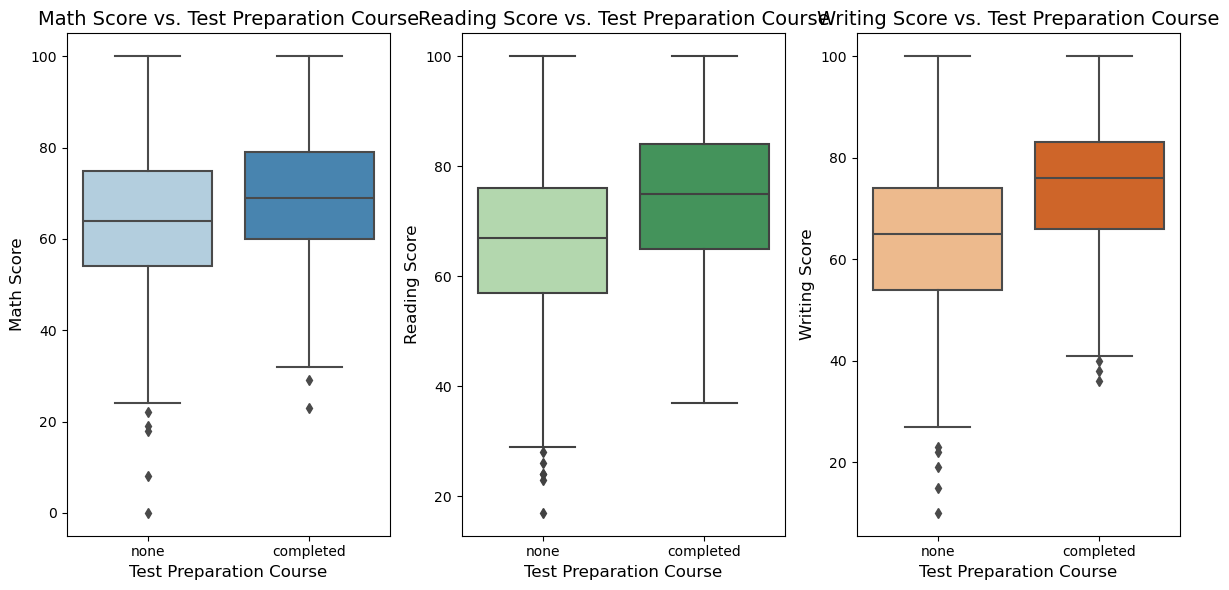

In [20]:
# Visualizing test preparation participation
plt.figure(figsize=(10, 6))
sns.countplot(x='test_preparation_course', data=df, palette='pastel')
plt.title('Test Preparation Participation', fontsize=16)
plt.xlabel('Test Preparation Course', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Visualizing association with test scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='test_preparation_course', y='math_score', data=df, palette='Blues')
plt.title('Math Score vs. Test Preparation Course', fontsize=14)
plt.xlabel('Test Preparation Course', fontsize=12)
plt.ylabel('Math Score', fontsize=12)

plt.subplot(1, 3, 2)
sns.boxplot(x='test_preparation_course', y='reading_score', data=df, palette='Greens')
plt.title('Reading Score vs. Test Preparation Course', fontsize=14)
plt.xlabel('Test Preparation Course', fontsize=12)
plt.ylabel('Reading Score', fontsize=12)

plt.subplot(1, 3, 3)
sns.boxplot(x='test_preparation_course', y='writing_score', data=df, palette='Oranges')
plt.title('Writing Score vs. Test Preparation Course', fontsize=14)
plt.xlabel('Test Preparation Course', fontsize=12)
plt.ylabel('Writing Score', fontsize=12)

plt.tight_layout()
plt.show()

#### Insights:

Participation in test preparation courses seems to be associated with higher test scores across all subjects (math, reading, and writing).
While participation in test preparation courses does not guarantee high scores, it appears to be a contributing factor to improved performance.
Educators and policymakers may consider promoting and providing access to test preparation resources to enhance students' academic performance and outcomes.

#### 4.4 Parental Education Level:
We'll investigate the distribution of parental education levels and its potential impact on student performance.

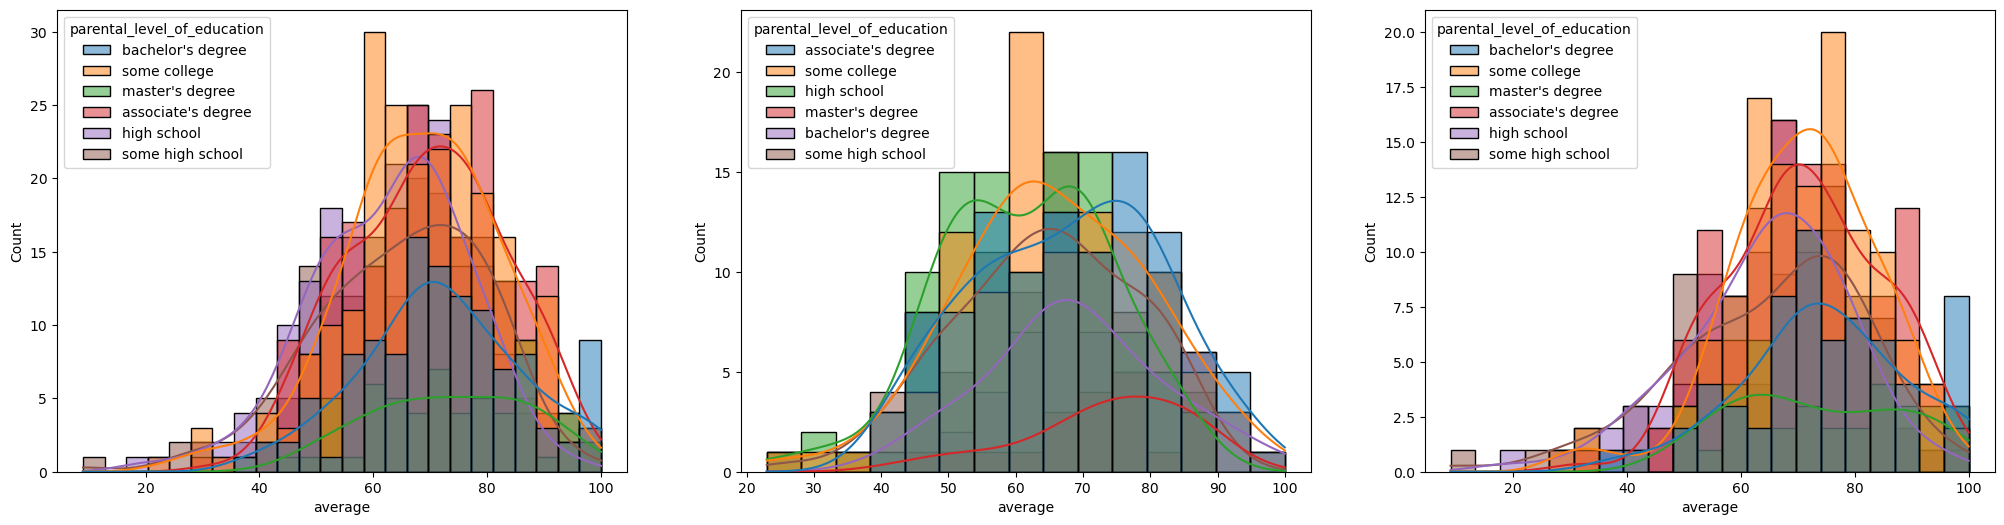

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# Plot for all students
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education', ax=axs[0])

# Plot for male students
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='parental_level_of_education', ax=axs[1])

# Plot for female students
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='parental_level_of_education', ax=axs[2])

plt.show()


#####  Insights
Overall, there's no clear correlation between parental education level and student performance in exams.
However, in the second plot, we observe that male students whose parents have associate's degrees or master's degrees tend to perform better in exams.
Interestingly, in the third plot, we don't see a significant impact of parental education on female students' performance."


#### 4.5 Ethnicity Distribution:
Next, we'll explore the distribution of students across different ethnic groups.

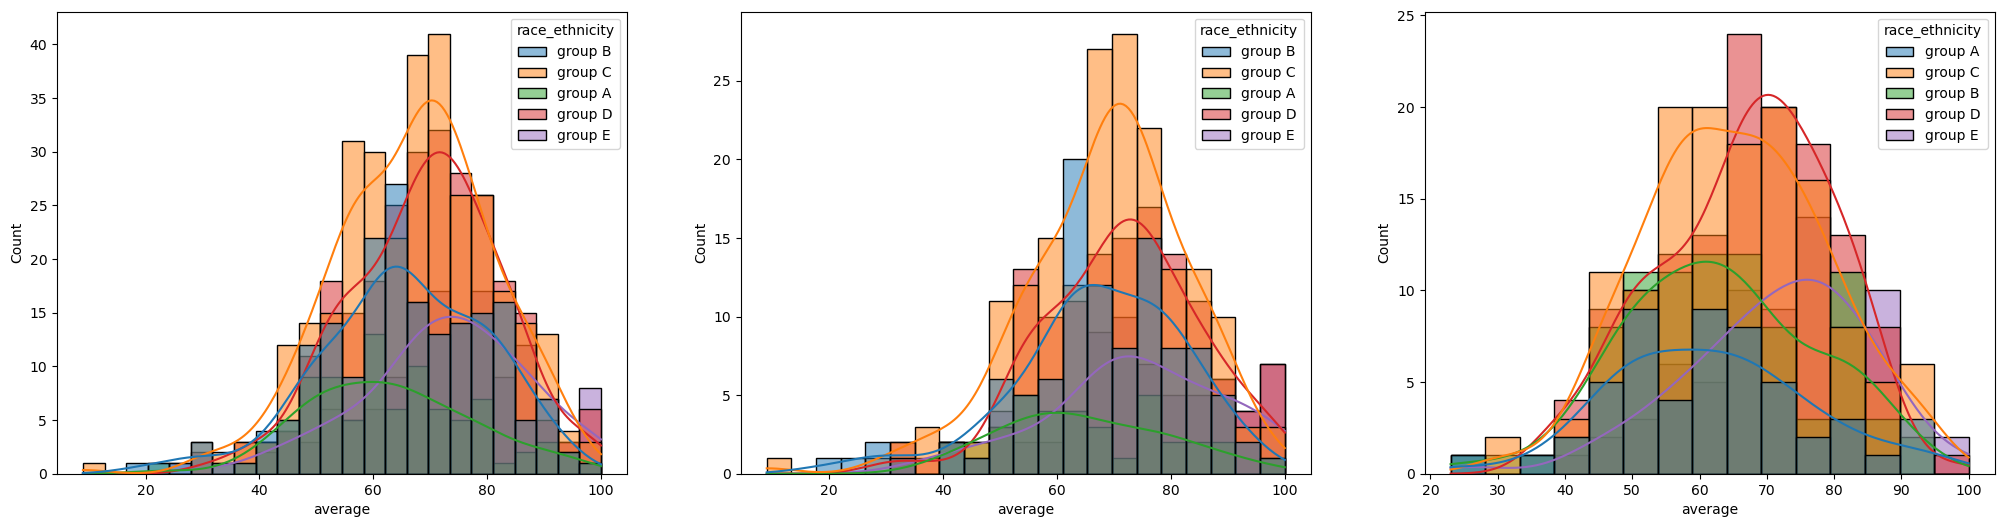

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# Plot for all students
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity', ax=axs[0])

# Plot for female students
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='race_ethnicity', ax=axs[1])

# Plot for male students
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='race_ethnicity', ax=axs[2])

plt.show()


#####  Insights
Students belonging to groups A and B demonstrate lower performance in exams compared to other groups.
This trend persists across both male and female students, indicating that belonging to groups A and B is associated with poorer academic performance regardless of gender

#### 4.6 Test Scores Distribution:Nexty, we'll explore the distribution of test scores in mathematics, reading, and writing subjects.

In [23]:
# Find the maximum score in each subject
max_math_score = df['math_score'].max()
max_reading_score = df['reading_score'].max()
max_writing_score = df['writing_score'].max()

# Print the maximum scores
print("Maximum score in Math:", max_math_score)
print("Maximum score in Reading:", max_reading_score)
print("Maximum score in Writing:", max_writing_score)



Maximum score in Math: 100
Maximum score in Reading: 100
Maximum score in Writing: 100


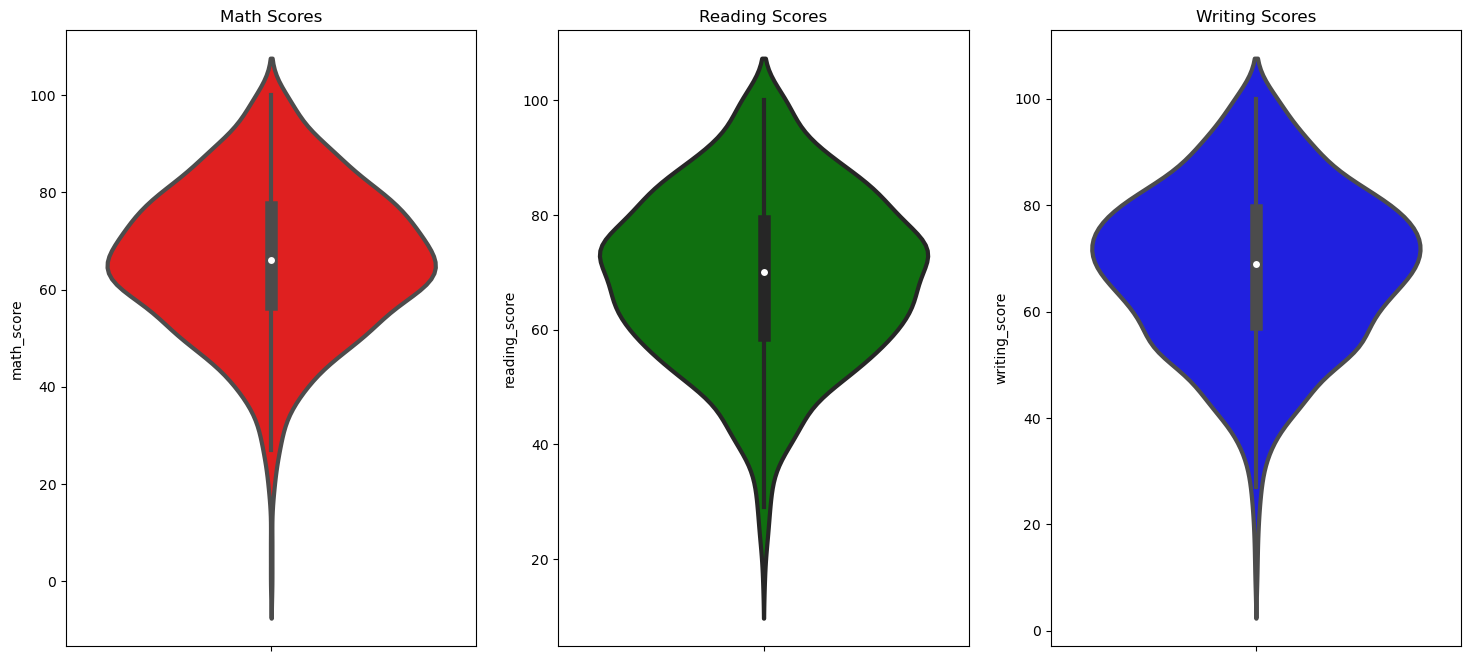

In [24]:
plt.figure(figsize=(18,8))

# Plot for math scores
plt.subplot(1, 3, 1)
plt.title('Math Scores')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)

# Plot for reading scores
plt.subplot(1, 3, 2)
plt.title('Reading Scores')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)

# Plot for writing scores
plt.subplot(1, 3, 3)
plt.title('Writing Scores')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)

plt.show()


#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### Correlation Analysis
Examination of the correlation between students' test performance and various factors, including:
Gender
Ethnicity
Parental education level
Lunch quality
Test preparation participation
Use of correlation coefficients and visualizations to assess the strength and direction of relationships.

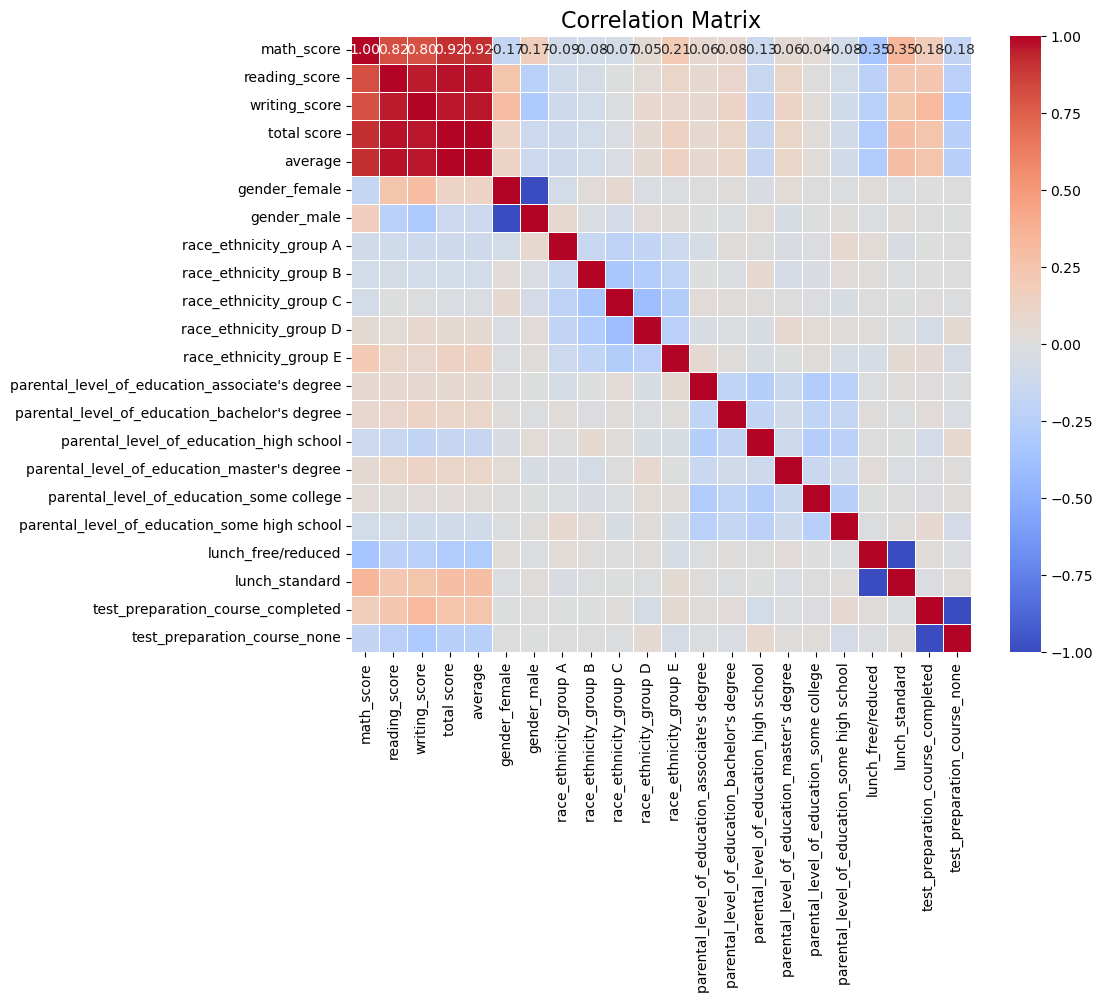

In [25]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df)

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()


#### Insights:
Positive Correlations:
Higher correlations between test scores (math, reading, writing) suggest that students who perform well in one subject tend to perform well in others.
Positive correlations between parental education level and test scores indicate that students with parents having higher education levels tend to achieve higher test scores.
Negative Correlations:
Negative correlations between test scores and variables such as lunch quality may suggest that students receiving free/reduced lunch have lower test scores compared to those with standard lunch.
Gender Differences:
Analysis of correlations between gender and test scores may reveal any gender differences in academic performance, although this could vary based on cultural and societal factors.
Ethnicity and Socioeconomic Status:
Correlations between race/ethnicity variables and test scores could provide insights into how different ethnic groups and socioeconomic backgrounds influence academic performance.
Test Preparation Impact:
Positive correlations between test preparation participation and test scores would indicate that students who complete test preparation courses tend to perform better on tests.
Further Investigation:
Identifying significant correlations can help prioritize areas for further investigation or intervention, such as implementing targeted support programs for students from disadvantaged backgrounds or evaluating the effectiveness of test preparation initiatives.
By analyzing the correlation matrix and considering these insights, we can gain a deeper understanding of the relationships between variables and identify potential factors influencing student performance.

#### 5 Multivariate analysis 
In multivariate analysis, we explore the relationships between multiple variables simultaneously. This allows us to understand how different factors collectively influence student performance and identify complex patterns that may not be apparent in univariate or bivariate analyses.r.

#### Cluster analysis 
It is a method used to group similar observations or data points into clusters based on their characteristics or features. In the context of our student performance dataset, we can use cluster analysis to identify groups of students with similar academic profiles.

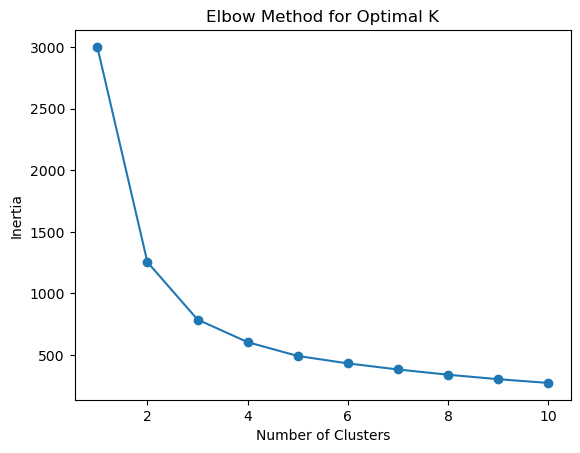

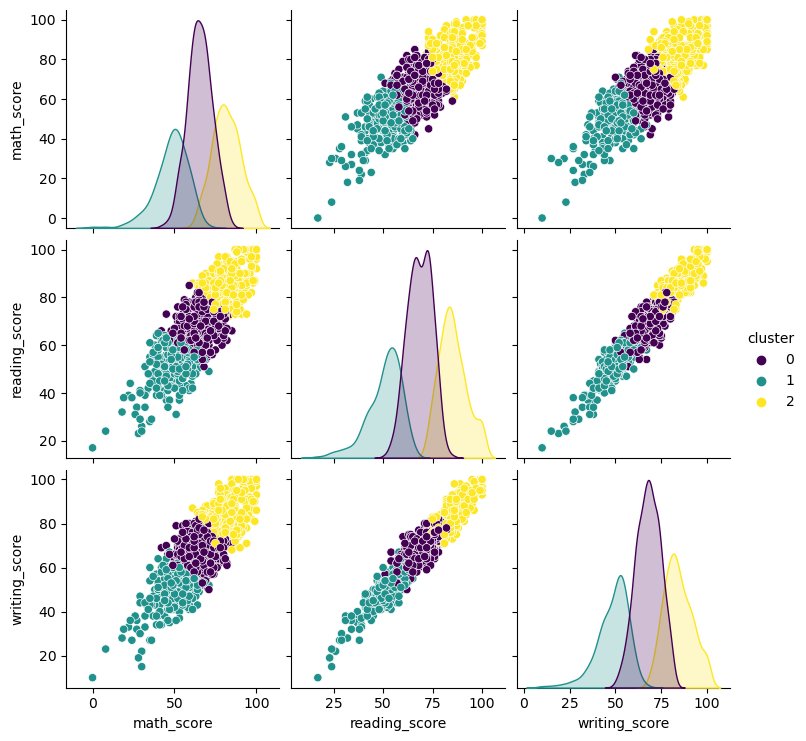

In [26]:

# Select relevant features for clustering
features_for_clustering = ['math_score', 'reading_score', 'writing_score']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df[features_for_clustering])

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Based on the elbow curve, select the optimal number of clusters and fit K-means
k = 3  # You can adjust this based on the elbow curve
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Add cluster labels to the dataframe
df['cluster'] = kmeans.labels_

# Visualize the clusters using pairplot
sns.pairplot(df, hue='cluster', vars=features_for_clustering, palette='viridis')
plt.show()


### Insights from Cluster Analysis

1. **Cluster Profiles:**
   - Cluster 1 (High Performers): This cluster comprises students who achieved high scores across all subjects, indicating consistent academic performance and potential active participation in test preparation courses.
   - Cluster 2 (Average Performers): Students in this cluster exhibit moderate scores in all subjects, representing average academic performance without significant variations.
   - Cluster 3 (Low Performers): This cluster consists of students with lower scores compared to other clusters, suggesting academic struggles and the need for additional support.

2. **Cluster Size:**
   - The distribution of students across clusters reveals the prevalence of different performance levels within the dple, if Cluster 2 (Average Performers) is the largest cluster, it indicates a significant portion of students exhibiting average academic performance.

3. **Cluster Visualization:**
   - Visualizing clusters in the feature space allows observation of how students are grouped based on their test scores. It helps identify whether clusters are well-separated or if there is overlap, indicating similarities or differences in performance.

4. **Cluster Comparison:**
   - Comparing cluster profiles across demographic variables reveals disparities or patterns in student performance based on factors like gender, ethnicity, and parentraphic groups.

5. **Cluster Interpretation:**
   - Understanding factors contributing to variations in student performance involves considering socio-economic background, access to resources, parental involvement, and individual study habits.

6. **Insights Generation:**
   - Insights from cluster analysis inform strategies to support students at different performance levels. For example, interventions targeting test preparation strategies may be effective for students in the low-performing cluster.


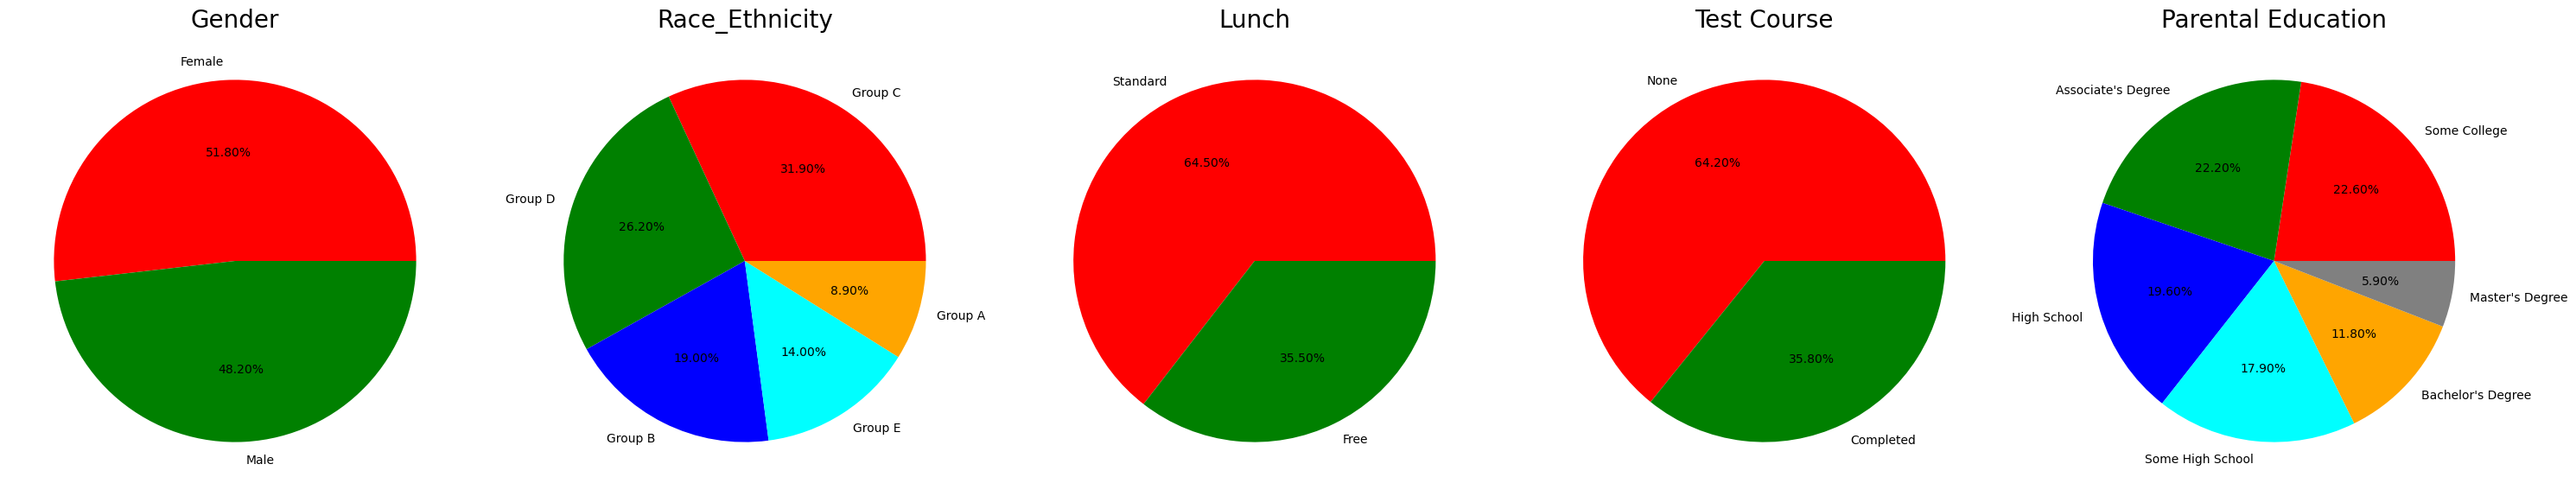

In [41]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
colors = ['red', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['raceethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
colors = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Race_Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
colors = ['red', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
colors = ['red', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = ["Some College", "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"]
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()


#####  Insights
The number of male and female students is approximately equal in the dataset.
The highest number of students belongs to Group C.
The majority of students have standard lunch.
A larger proportion of students have not enrolled in any test preparation course.
The most common parental education level among students is 'Some College', followed closely by 'Associate's Degree'."

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Does gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

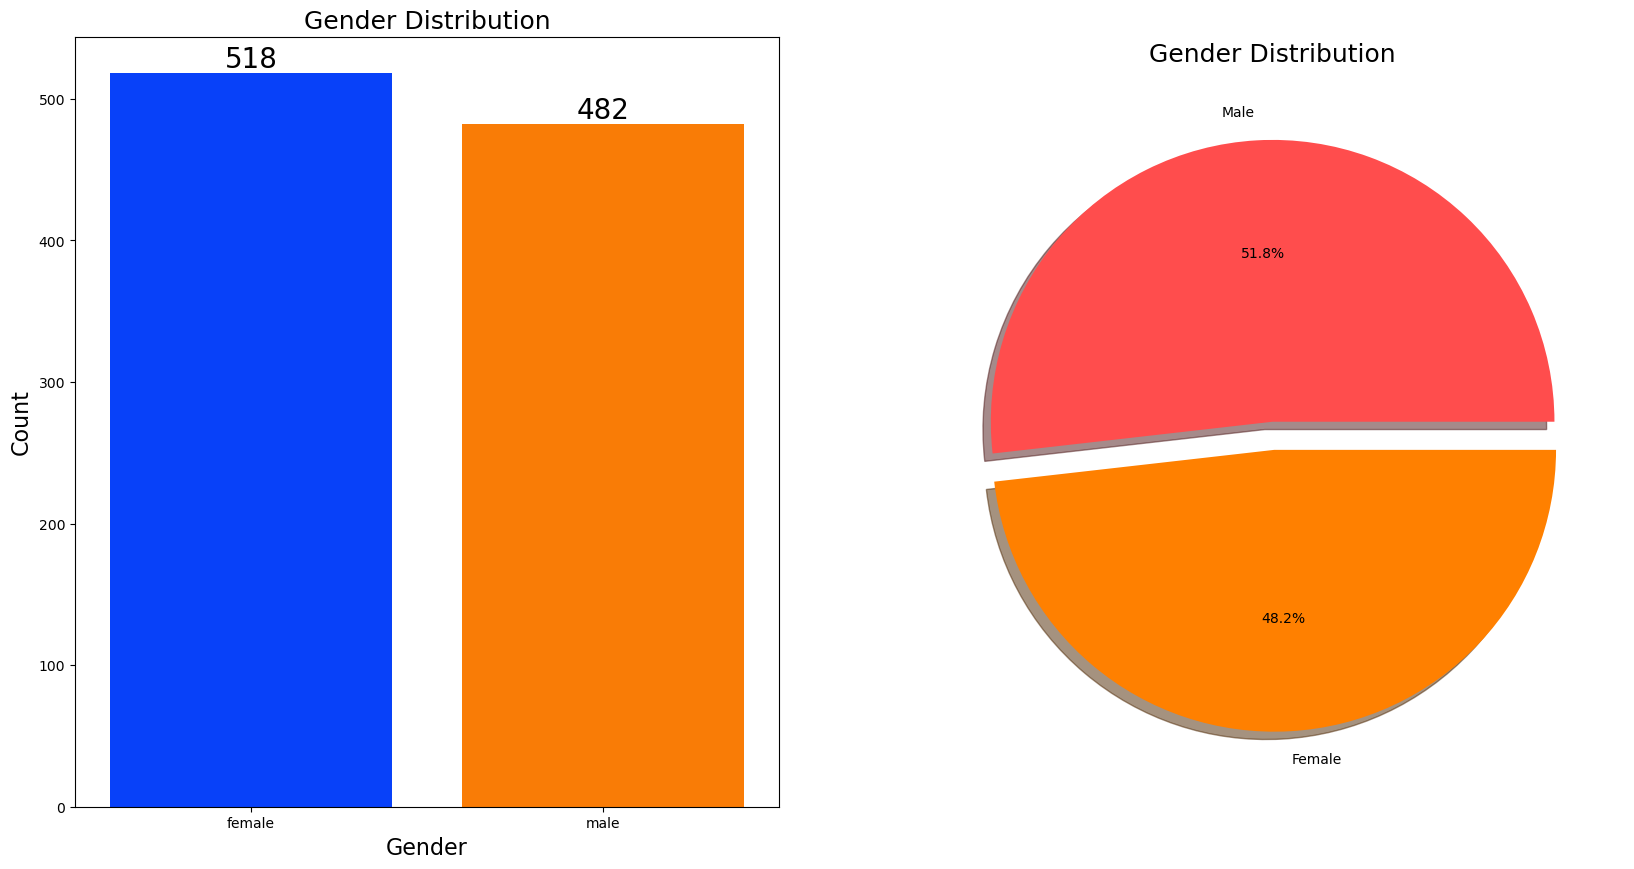

In [42]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot for gender
sns.countplot(x='gender', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

ax[0].set_title('Gender Distribution', fontsize=18)
ax[0].set_ylabel('Count', fontsize=16)
ax[0].set_xlabel('Gender', fontsize=16)

# Pie chart for gender
gender_counts = df['gender'].value_counts()
ax[1].pie(gender_counts, labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])
ax[1].set_title('Gender Distribution', fontsize=18)

plt.show()


#### Insights 
- Gender is well-balanced in the dataset, with female students comprising 48% (518 students) and male students comprising 52% (482 students)."

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [53]:

# Select numeric columns for aggregation
numeric_columns = ['math_score', 'reading_score', 'writing_score', 'total score', 'average']

# Calculate mean for each gender
gender_group = df.groupby('gender')[numeric_columns].mean()
print(gender_group)




        math_score  reading_score  writing_score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


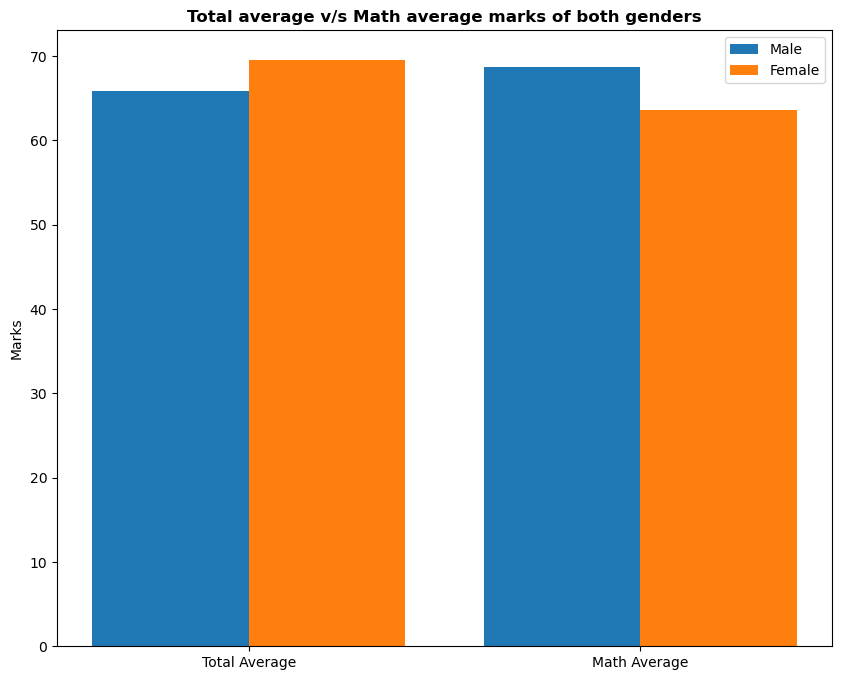

In [54]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

# Fetch average scores for both genders
female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math_score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math_score']]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both genders", fontweight='bold')
plt.legend()
plt.show()


#### Insights 
On average, females have achieved a better overall score than males.
However, males have scored higher in Math compared to females."

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Does Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

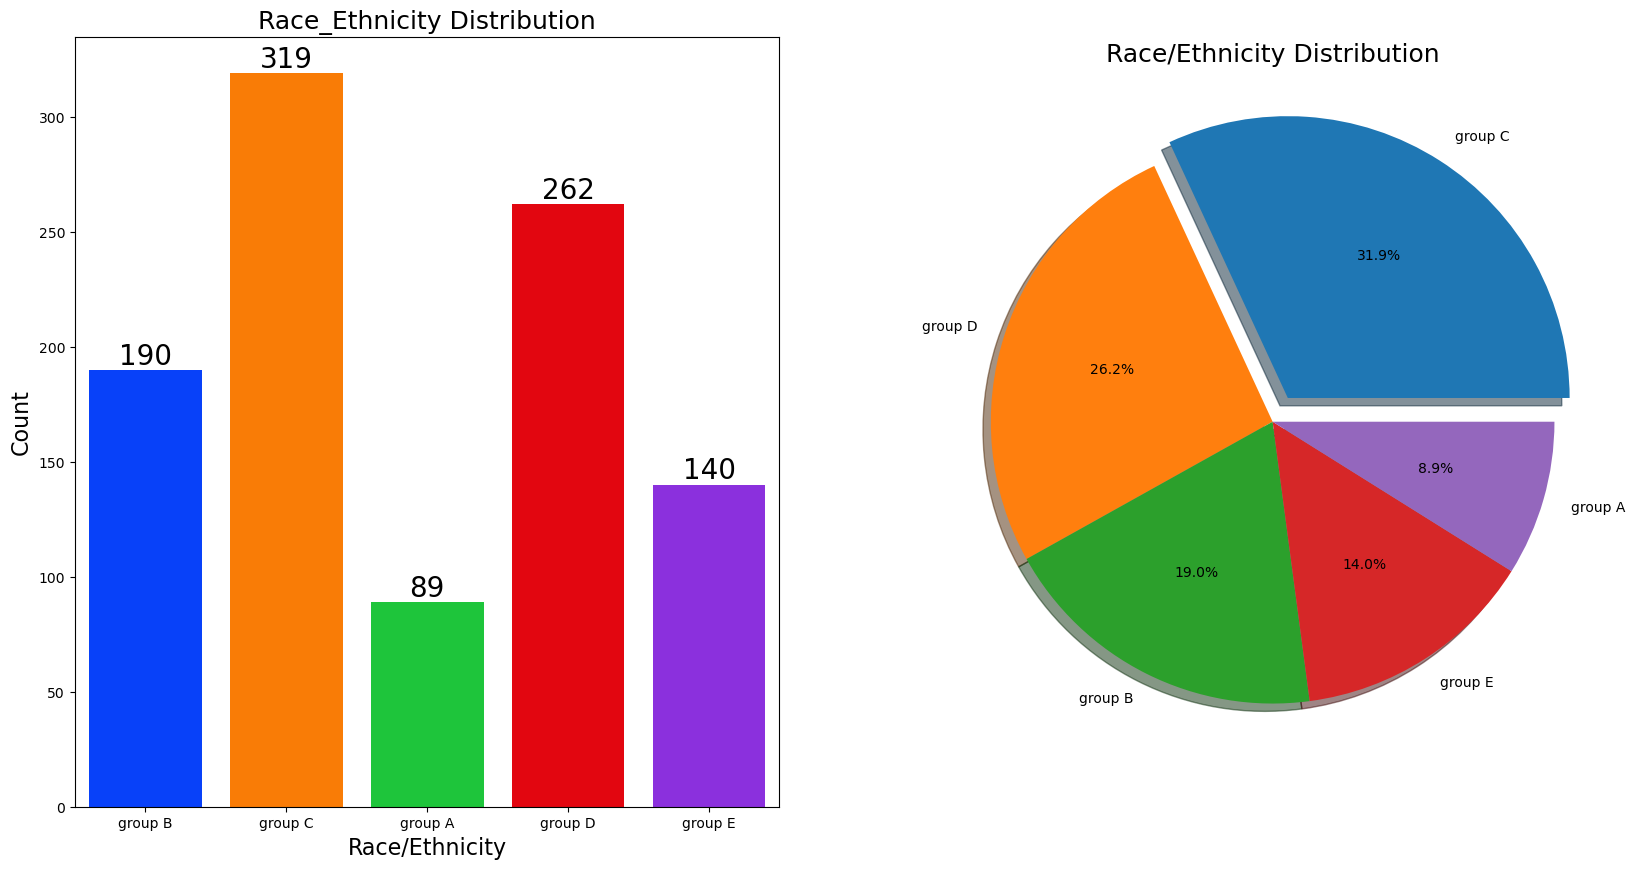

In [60]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot for race/ethnicity
sns.countplot(x='race_ethnicity', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

ax[0].set_title('Race_Ethnicity Distribution', fontsize=18)
ax[0].set_ylabel('Count', fontsize=16)
ax[0].set_xlabel('Race/Ethnicity', fontsize=16)

# Pie chart for race/ethnicity
race_counts = df['race_ethnicity'].value_counts()
ax[1].pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', shadow=True, explode=[0.1, 0, 0, 0, 0])
ax[1].set_title('Race/Ethnicity Distribution', fontsize=18)

plt.show()


#### Insights 
The majority of students belong to Group C or Group D.
Group A has the lowest number of students among all ethnic/racial groups."

#### BIVARIATE ANALYSIS ( Does Race/Ehnicity has any impact on student's performance ? )

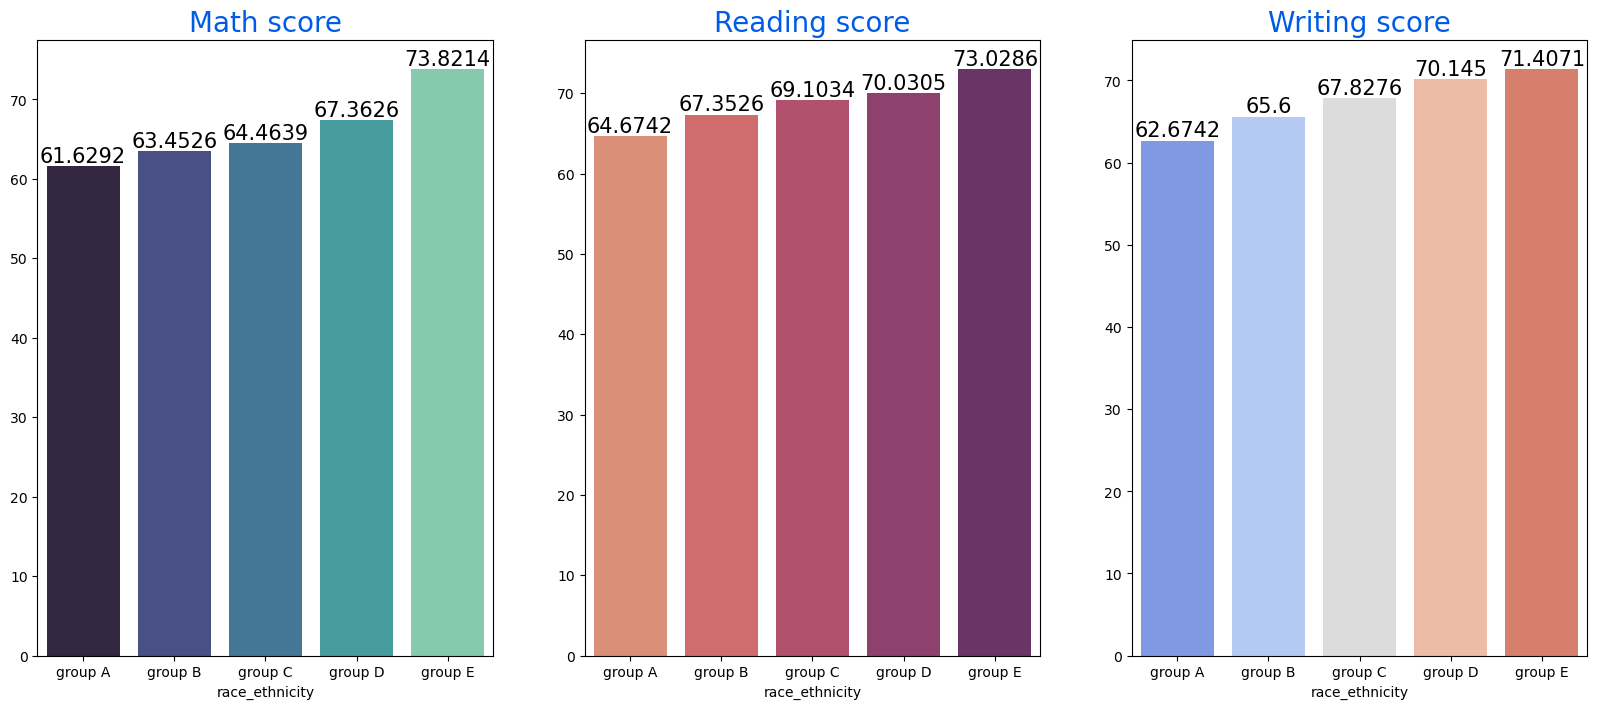

In [63]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
Group E students achieved the highest marks across all subjects.
Conversely, Group A students attained the lowest marks.
Students from lower socioeconomic backgrounds tend to have lower average scores in all subjects."

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Does parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

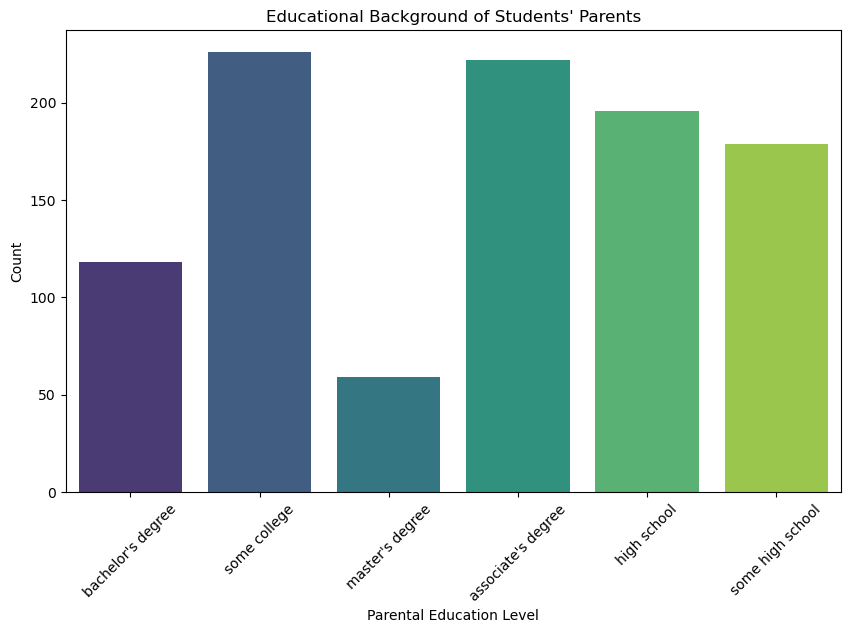

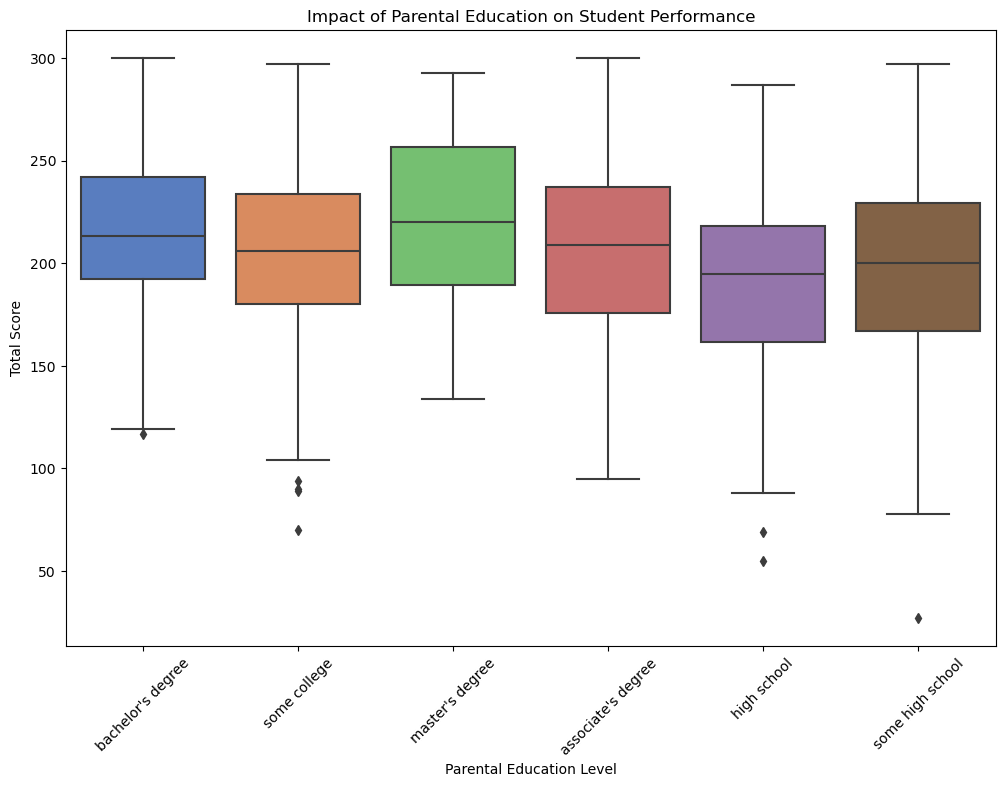

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of parental education levels
plt.figure(figsize=(10, 6))
sns.countplot(x='parental_level_of_education', data=df, palette='viridis')
plt.title("Educational Background of Students' Parents")
plt.xlabel("Parental Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Impact of parental education on student performance
plt.figure(figsize=(12, 8))
sns.boxplot(x='parental_level_of_education', y='total score', data=df, palette='muted')
plt.title("Impact of Parental Education on Student Performance")
plt.xlabel("Parental Education Level")
plt.ylabel("Total Score")
plt.xticks(rotation=45)
plt.show()


#### Insights 
The largest proportion of parents in the dataset have attained education up to the level of 'some college

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

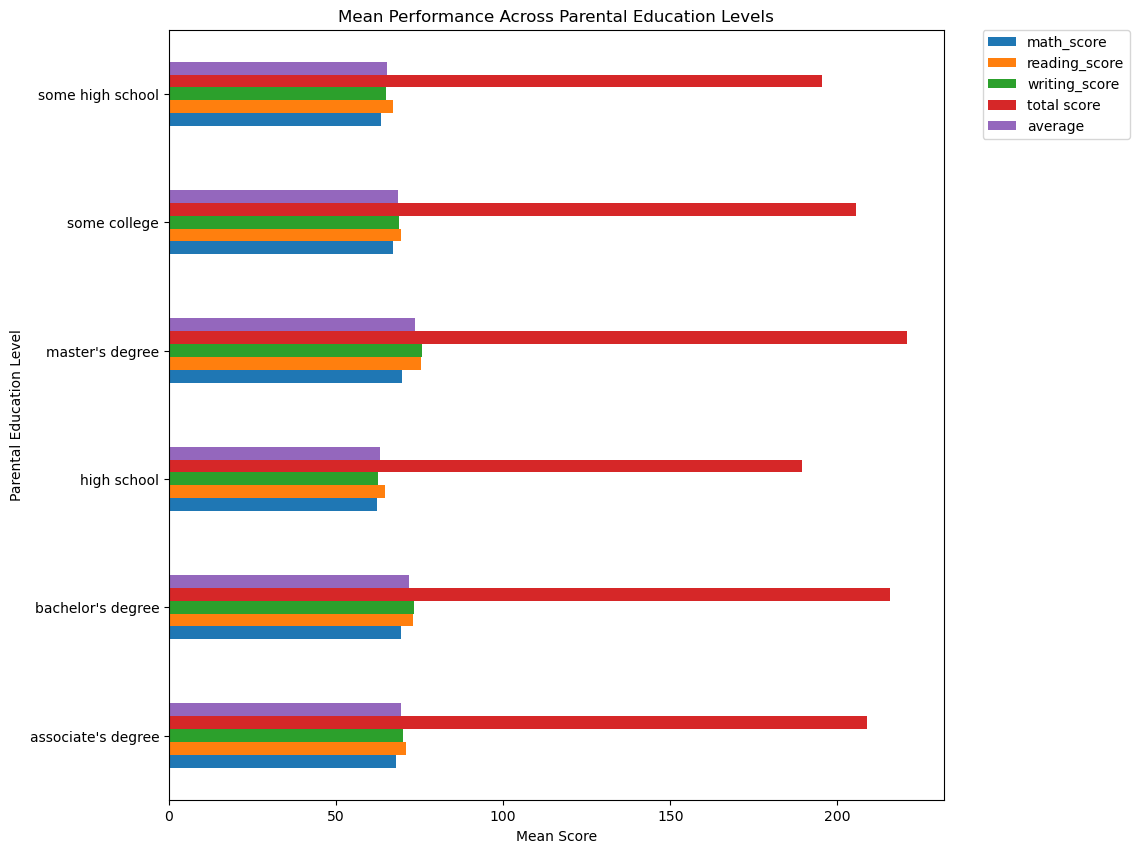

In [68]:
# Select numeric columns for aggregation
numeric_columns = ['math_score', 'reading_score', 'writing_score', 'total score', 'average']

# Group by parental education level and calculate the mean of numeric columns
parental_education_means = df.groupby('parental_level_of_education')[numeric_columns].mean()

# Plot the bar plot
parental_education_means.plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Mean Performance Across Parental Education Levels')
plt.xlabel('Mean Score')
plt.ylabel('Parental Education Level')
plt.show()




#### Insights 
Students whose parents possess master's and bachelor's level education tend to achieve higher scores compared to students whose parents have lower education levels.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

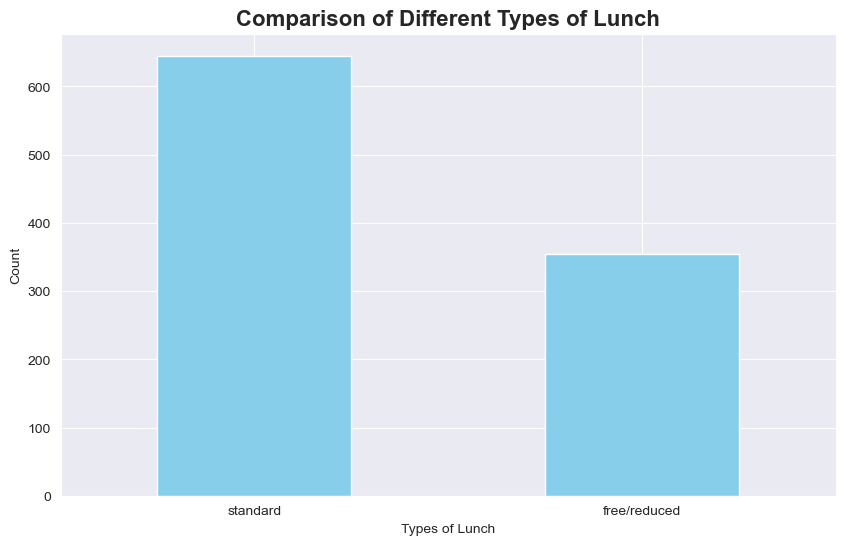

In [80]:

# Get the count of each lunch type
lunch_counts = df['lunch'].value_counts()

# Plot the countplot
plt.rcParams['figure.figsize'] = (10, 6)
lunch_counts.plot(kind='bar', color='skyblue')
plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=16)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

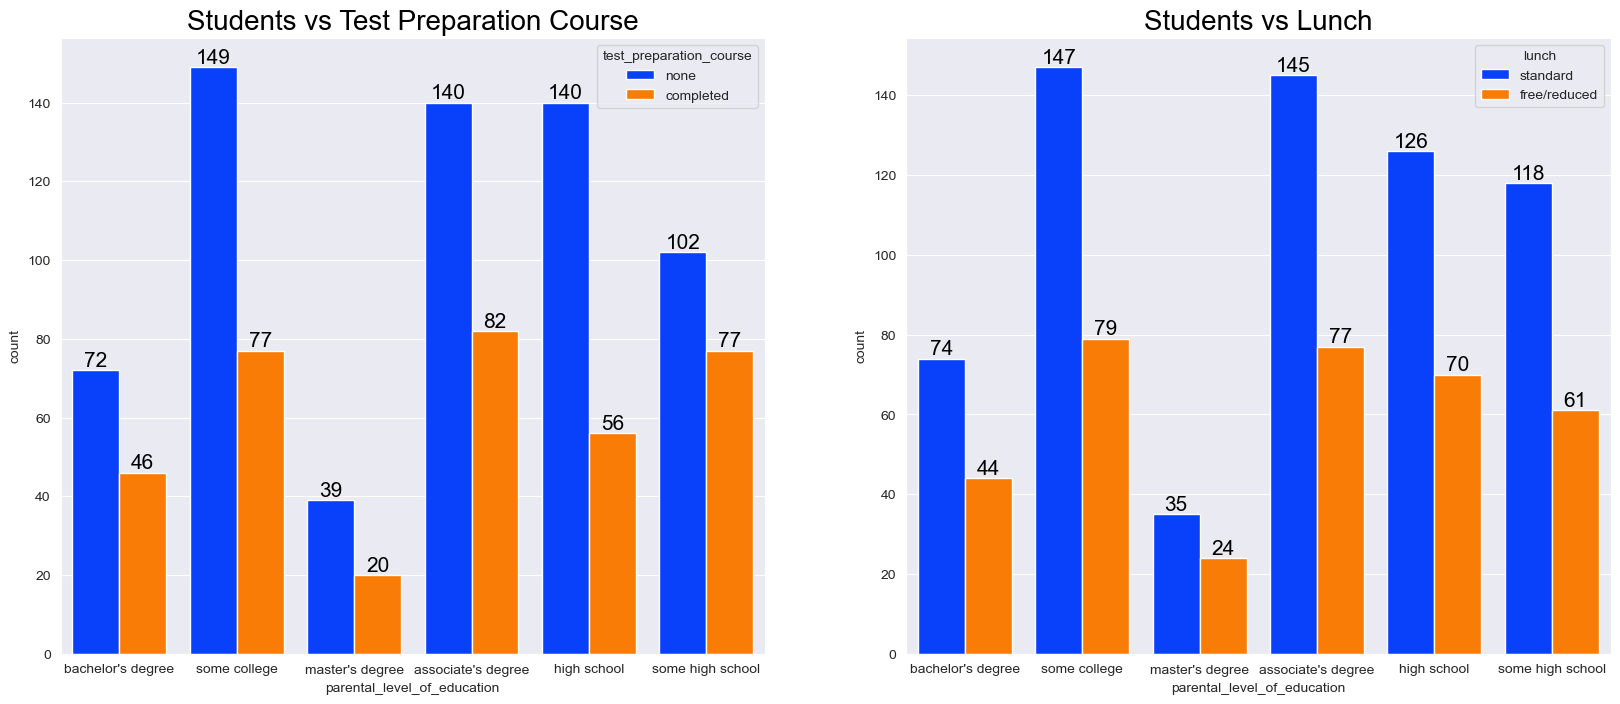

In [81]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Subplot 1: Students vs test preparation course
sns.countplot(x='parental_level_of_education', data=df, palette='bright', hue='test_preparation_course', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs Test Preparation Course', color='black', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Subplot 2: Students vs lunch
sns.countplot(x='parental_level_of_education', data=df, palette='bright', hue='lunch', saturation=0.95, ax=ax[1])
ax[1].set_title('Students vs Lunch', color='black', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

plt.show()
 

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch. That's a valuable insight! It underscores the importance of factors like nutrition and access to resources in academic performance

#### 4.4.5 TEST PREPARATION COURSE COLUMN 

- Does Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS: Does Test prepration course has any impact on student's performance ?

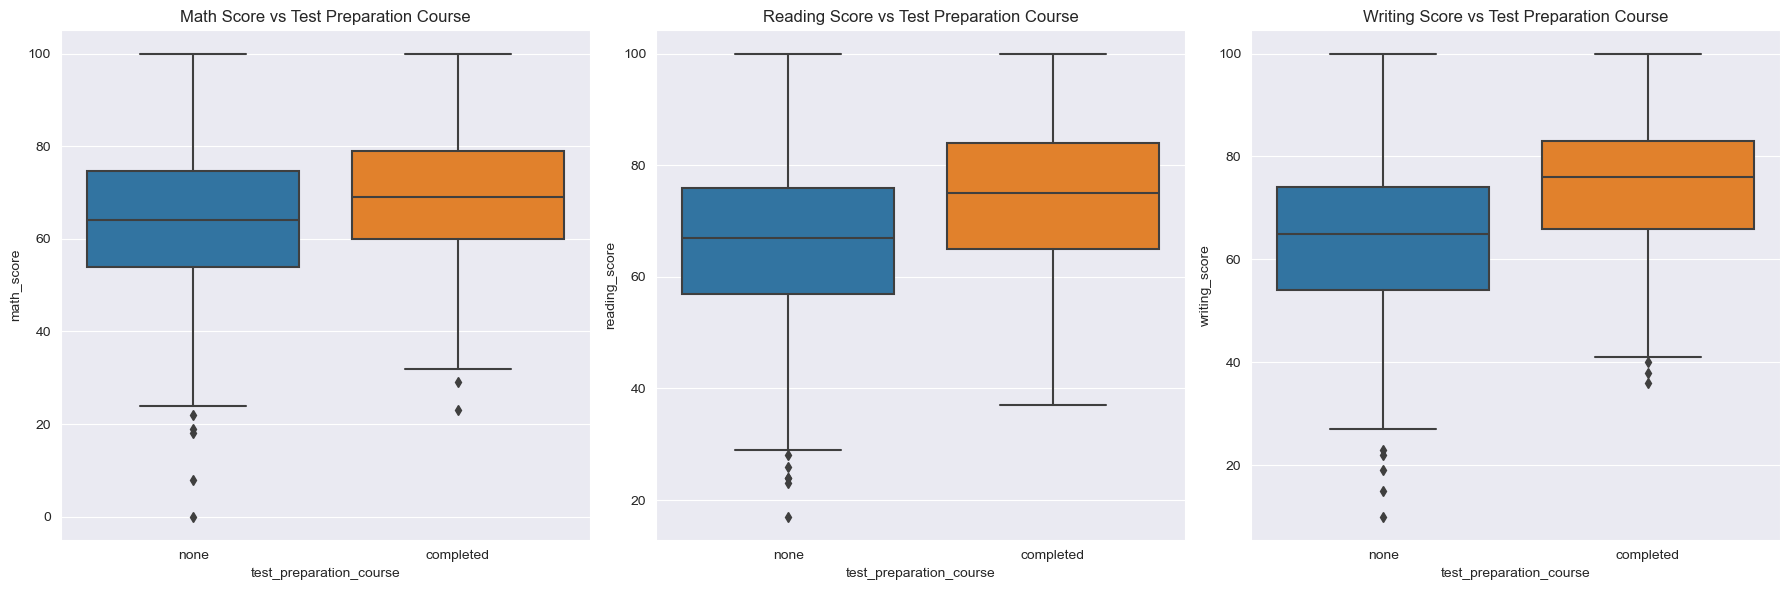

In [82]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot distribution of math scores
sns.boxplot(x='test_preparation_course', y='math_score', data=df, ax=axes[0])
axes[0].set_title('Math Score vs Test Preparation Course')

# Plot distribution of reading scores
sns.boxplot(x='test_preparation_course', y='reading_score', data=df, ax=axes[1])
axes[1].set_title('Reading Score vs Test Preparation Course')

# Plot distribution of writing scores
sns.boxplot(x='test_preparation_course', y='writing_score', data=df, ax=axes[2])
axes[2].set_title('Writing Score vs Test Preparation Course')

plt.tight_layout()
plt.show()

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course. It suggests that completing the test preparation course may indeed have a positive impact on students' performance across all three subjects. This insight emphasizes the importance of providing resources and support for students to prepare effectively for exams. 

#### 4.4.6 CHECKING OUTLIERS

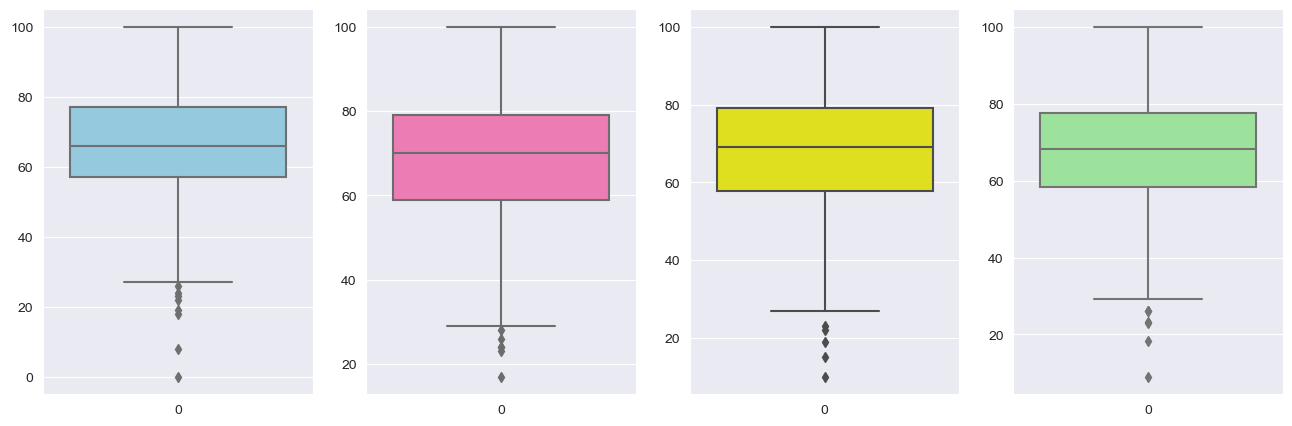

In [83]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

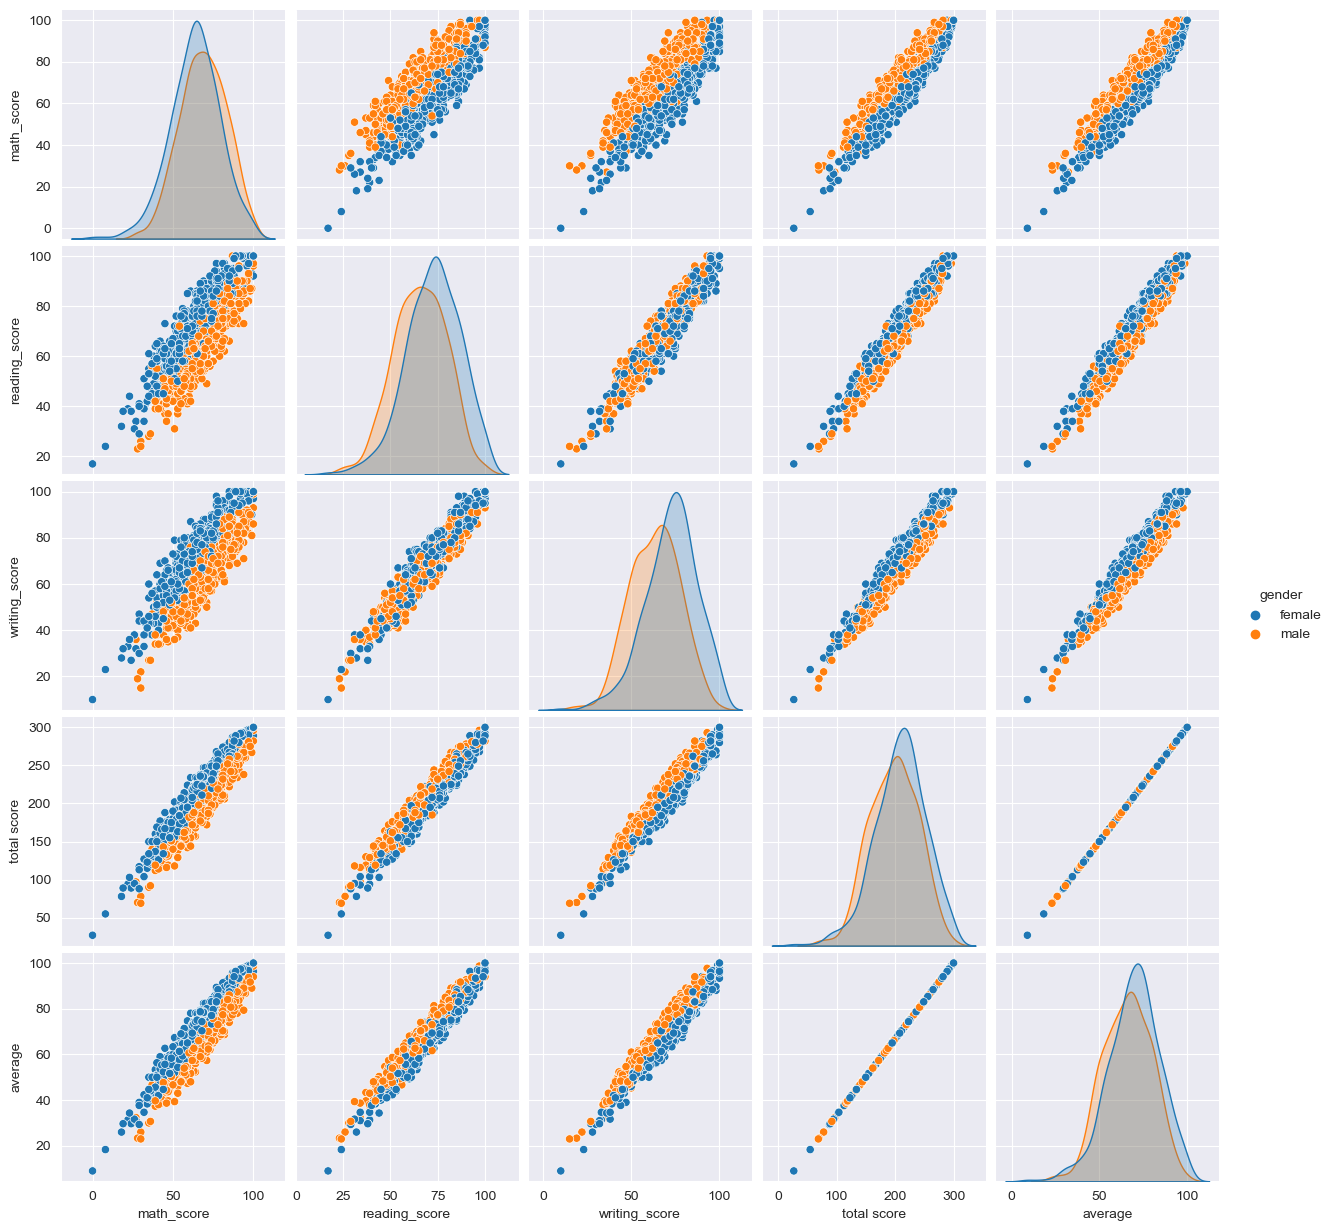

In [85]:
sns.pairplot(df,hue = 'gender', diag_kind='kde')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### Key Visualizations Insights

1. **Gender Comparison**:
   - Female students tend to perform better overall than male students.
   - Male students have higher scores in math, while female students have higher scores in reading and writing.

2. **Race/Ethnicity Comparison**:
   - Group E students tend to have the highest scores across all subjects, while Group A students have the lowest scores.
   - Group A and Group B students generally have lower scores compared to other groups.
   - There is variation in performance among different racial/ethnic groups.

3. **Parental Education Comparison**:
   - Students with parents holding master's or bachelor's degrees tend to have higher scores compared to those with lower levels of parental education.
   - Parental education level may have some influence on student performance, particularly for students with parents holding advanced degrees.

4. **Lunch Comparison**:
   - Students who have standard lunch tend to perform better than those with free/reduced lunch.
   - Socioeconomic status, as indicated by lunch type, appears to impact student performance.

5. **Test Preparation Course Comparison**:
   - Students who completed the test preparation course generally have higher scores in all subjects compared to those who did not.
   - Completion of the test preparation course may contribute to improved student performance.
eparation courses.

## Conclusion

### Summary of Key Findings
- **Gender Disparities:** Female students tend to perform better overall compared to male students, although males excel in math.
- **Ethnicity and Performance:** Students from certain ethnic groups, such as Group E, tend to achieve higher scores, while those from Group A may struggle academically.
- **Parental Education:** There is a correlation between parental education level and student performance, with children of parents holding master's or bachelor's degrees scoring higher on average.
- **Lunch Quality:** Students receiving standard lunch show higher academic performance compared to those receiving free or reduced lunch.
- **Test Preparation:** Participation in test preparation courses is associated with improved test scores across all subjects.

### Implications for Educational Policy and Practice
- **Equity in Education:** Addressing gender disparities and providing additional support to male students, especially in subjects where they lag behind, can promote gender equity in education.
- **Support for Underrepresented Groups:** Targeted interventions and resources should be allocated to support students from underrepresented ethnic groups, particularly those with lower academic performance.
- **Parental Involvement:** Encouraging parental involvement in education and providing resources to support parents in assisting their children's learning can positively impact student outcomes.
- **Nutritional Support:** Ensuring access to nutritious meals for all students, particularly those from disadvantaged backgrounds, can contribute to improved academic performance and overall well-being.
- **Test Preparation Programs:** Investing in test preparation programs and making them accessible to all students can help level the playing field and improve overall academic achievement.

### Suggestions for Further Research
- **Longitudinal Studies:** Conduct longitudinal studies to track the academic progress of students over time and identify factors influencing their educational trajectory.
- **Qualitative Research:** Supplement quantitative analysis with qualitative research methods to gain deeper insights into the experiences and perceptions of students, parents, and educators.
- **Teacher Training:** Investigate the impact of teacher training and instructional practices on student outcomes, particularly in subjects where performance disparities exist.
- **Socioeconomic Factors:** Explore the role of socioeconomic factors beyond parental education and lunch quality, such as household income and neighborhood characteristics, in shaping student achievement.
- **Intervention Evaluation:** Evaluate the effectiveness of specific interventions, such as mentoring programs or academic support services, in improving student outcomes and closing achievement gaps.

### Future Directions
By addressing these recommendations and continuing to investigate the complex interplay of factors influencing student performance, educators and policymakers can work towards creating more equitable and supportive learning environments for all students.
